# USDM & SPI Snapshot Exploration

a. stein 6.2.2022

To get a better understanding of what USDM and SPI looks like across the years, this notebook creates some snapshot plots to look at drought metric evolution with time.

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import xarray as xr
import rioxarray
import rasterio as rio
import pandas as pd
import geopandas as gpd

import matplotlib.dates as mdates

from tqdm.autonotebook import tqdm

import sys
sys.path.append('../../')
import ndrought.wrangle as wrangle
import ndrought.compare as compare
import ndrought.plotting as ndplot

Populating the interactive namespace from numpy and matplotlib


/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/ipykernel_launcher.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


In [2]:
dm_path = '/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures'

spi_intervals = ['14d', '30d', '90d', '180d', '270d', '1y', '2y', '5y', ]

In [3]:
usdm = xr.open_dataset(f'{dm_path}/usdm/USDM_WA_20000104_20220412.nc')
usdm

<xarray.Dataset>
Dimensions:  (lat: 139, lon: 314, date: 1163)
Coordinates:
  * lat      (lat) float64 49.0 48.97 48.95 48.92 ... 45.62 45.6 45.57 45.55
  * lon      (lon) float64 -124.7 -124.7 -124.7 -124.7 ... -117.0 -116.9 -116.9
  * date     (date) datetime64[ns] 2000-01-04 2000-01-11 ... 2022-04-12
Data variables:
    USDM     (date, lat, lon) float64 ...
Attributes:
    compilation:  a. stein, 4/20/2022
    description:  weekly gridded United States Drought Monitor (USDM) from 1/...
    source:       https://www1.ncdc.noaa.gov/pub/data/nidis/geojson/us/usdm-t...
    crs:          EPSG:4326
    join:         lat, lon taken from 2000-01-04 file
    clipping:     original data was clipped to Washington using http://eric.c...

In [4]:
spi = xr.open_dataset(f'{dm_path}/spi/WA/spi_usdmcat_WA.nc')
spi

<xarray.Dataset>
Dimensions:   (lat: 84, lon: 188, day: 1148)
Coordinates:
  * lat       (lat) float64 48.98 48.94 48.9 48.86 ... 45.65 45.61 45.57 45.53
  * lon       (lon) float64 -124.7 -124.7 -124.6 -124.6 ... -117.0 -117.0 -116.9
  * day       (day) datetime64[ns] 1999-12-31 2000-01-10 ... 2021-12-26
Data variables:
    spi_1y    (day, lat, lon) float32 ...
    spi_2y    (day, lat, lon) float32 ...
    spi_5y    (day, lat, lon) float32 ...
    spi_14d   (day, lat, lon) float32 ...
    spi_30d   (day, lat, lon) float32 ...
    spi_90d   (day, lat, lon) float32 ...
    spi_180d  (day, lat, lon) float32 ...
    spi_270d  (day, lat, lon) float32 ...
Attributes:
    author:       a. stein, 4/28/2022
    description:  Standardized Precipitation Index (SPI) gathered from variou...
    clipping:     Clipped to Washington state using http://eric.clst.org/asse...

In [7]:
cmap = ndplot.usdm_cmap()

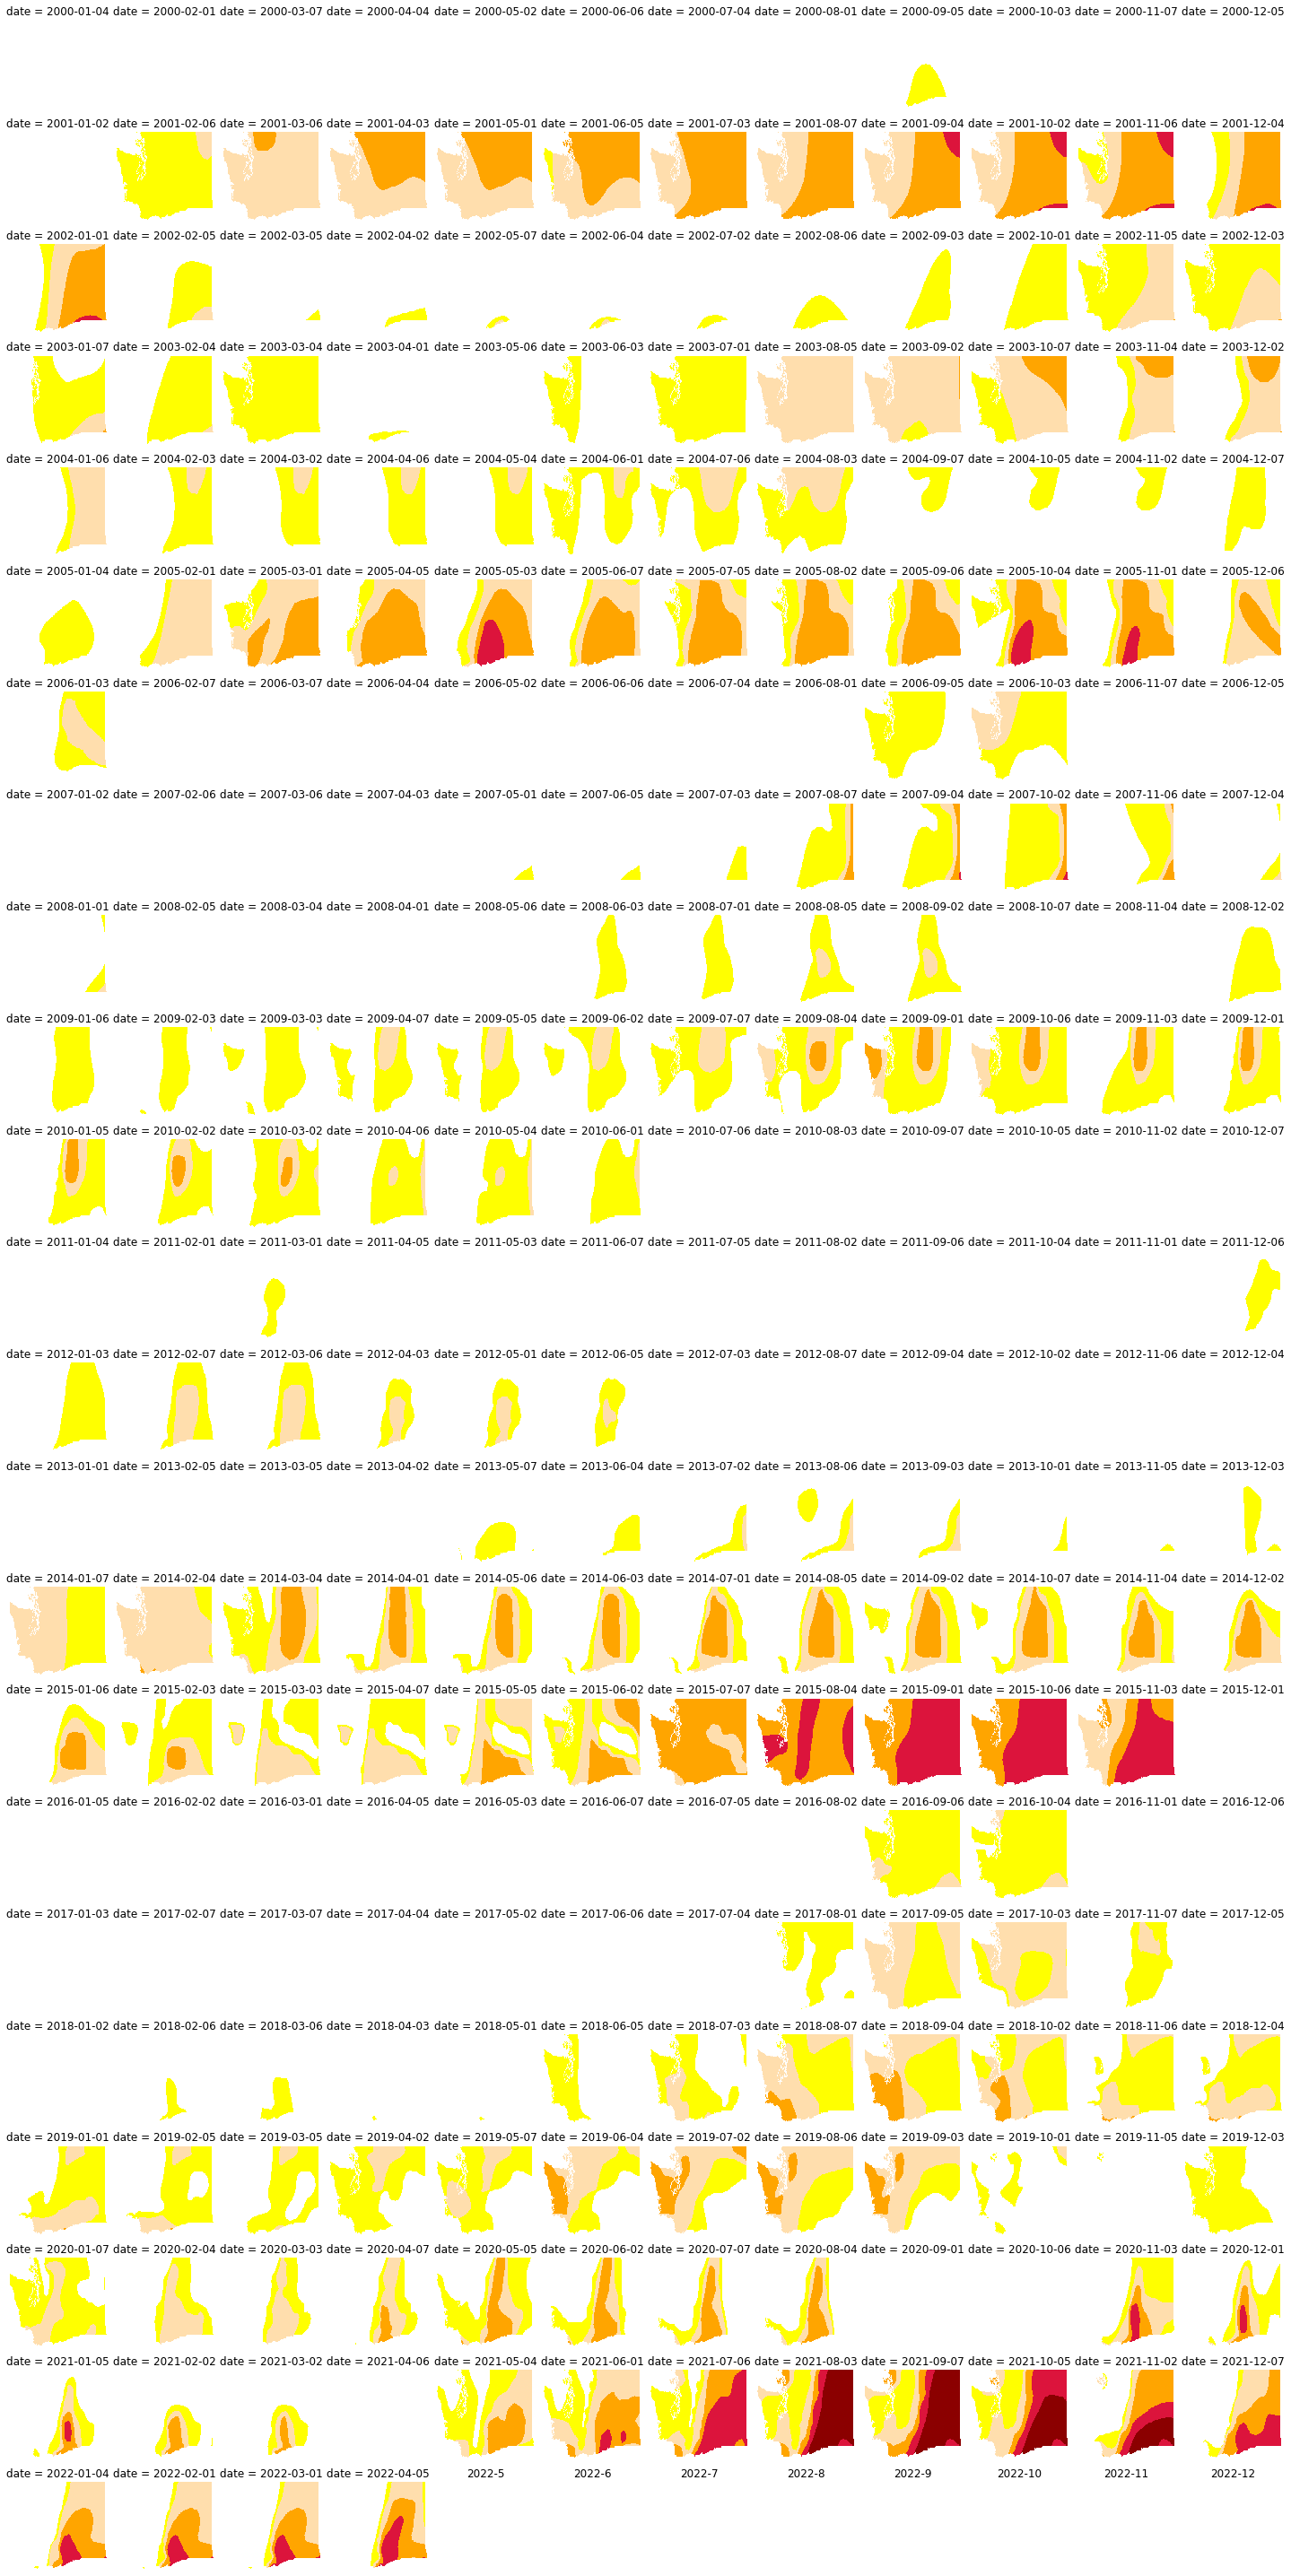

In [16]:
years = np.arange(2000, 2023, 1)
months = np.arange(1,13,1)

fig, axs = plt.subplots(23, 12, figsize=(20, 40))

for i, year in enumerate(years):
    for j, month in enumerate(months):
        try:
            axs[i,j].set_title(f'{year}-{month}')
            usdm['USDM'].sel(date=f'{year}-{month}').isel(date=0).plot(ax=axs[i,j], cmap=cmap, vmin=-1, vmax=4, add_colorbar=False)
            
            
        except:
            pass

        axs[i,j].axis('off')

plt.tight_layout()

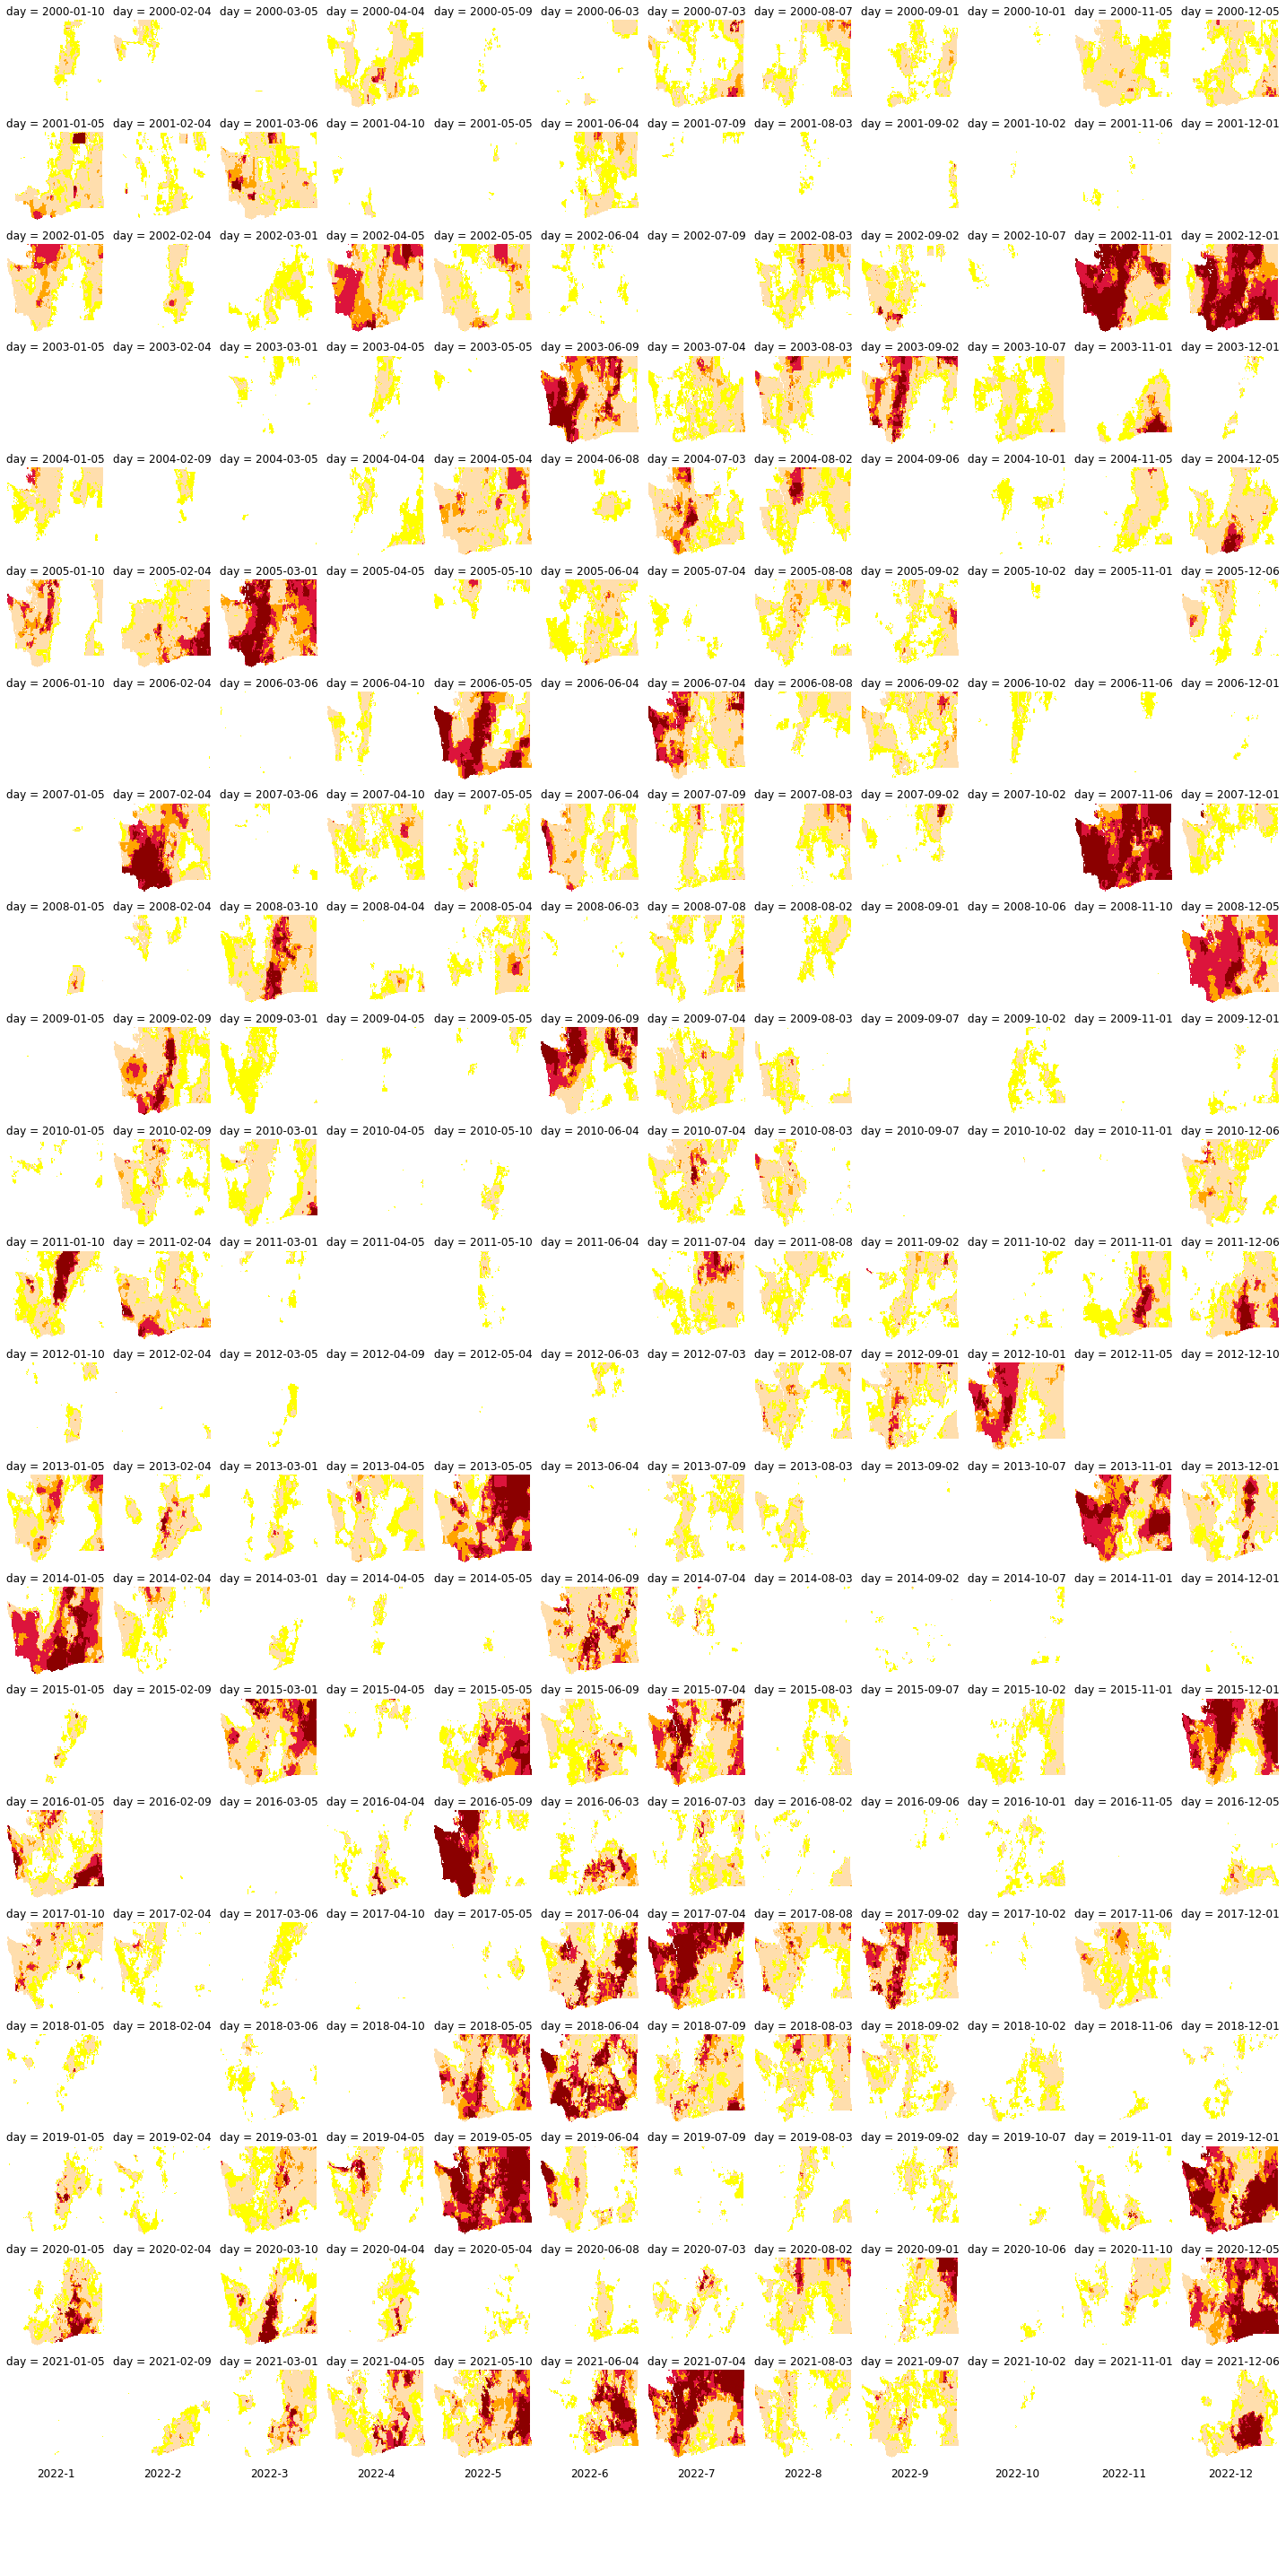

In [18]:
years = np.arange(2000, 2023, 1)
months = np.arange(1,13,1)

fig, axs = plt.subplots(23, 12, figsize=(20, 40))

for i, year in enumerate(years):
    for j, month in enumerate(months):
        try:
            axs[i,j].set_title(f'{year}-{month}')
            spi['spi_14d'].sel(day=f'{year}-{month}').isel(day=0).plot(ax=axs[i,j], cmap=cmap, vmin=-1, vmax=4, add_colorbar=False)
            
            
        except:
            pass

        axs[i,j].axis('off')

plt.tight_layout()

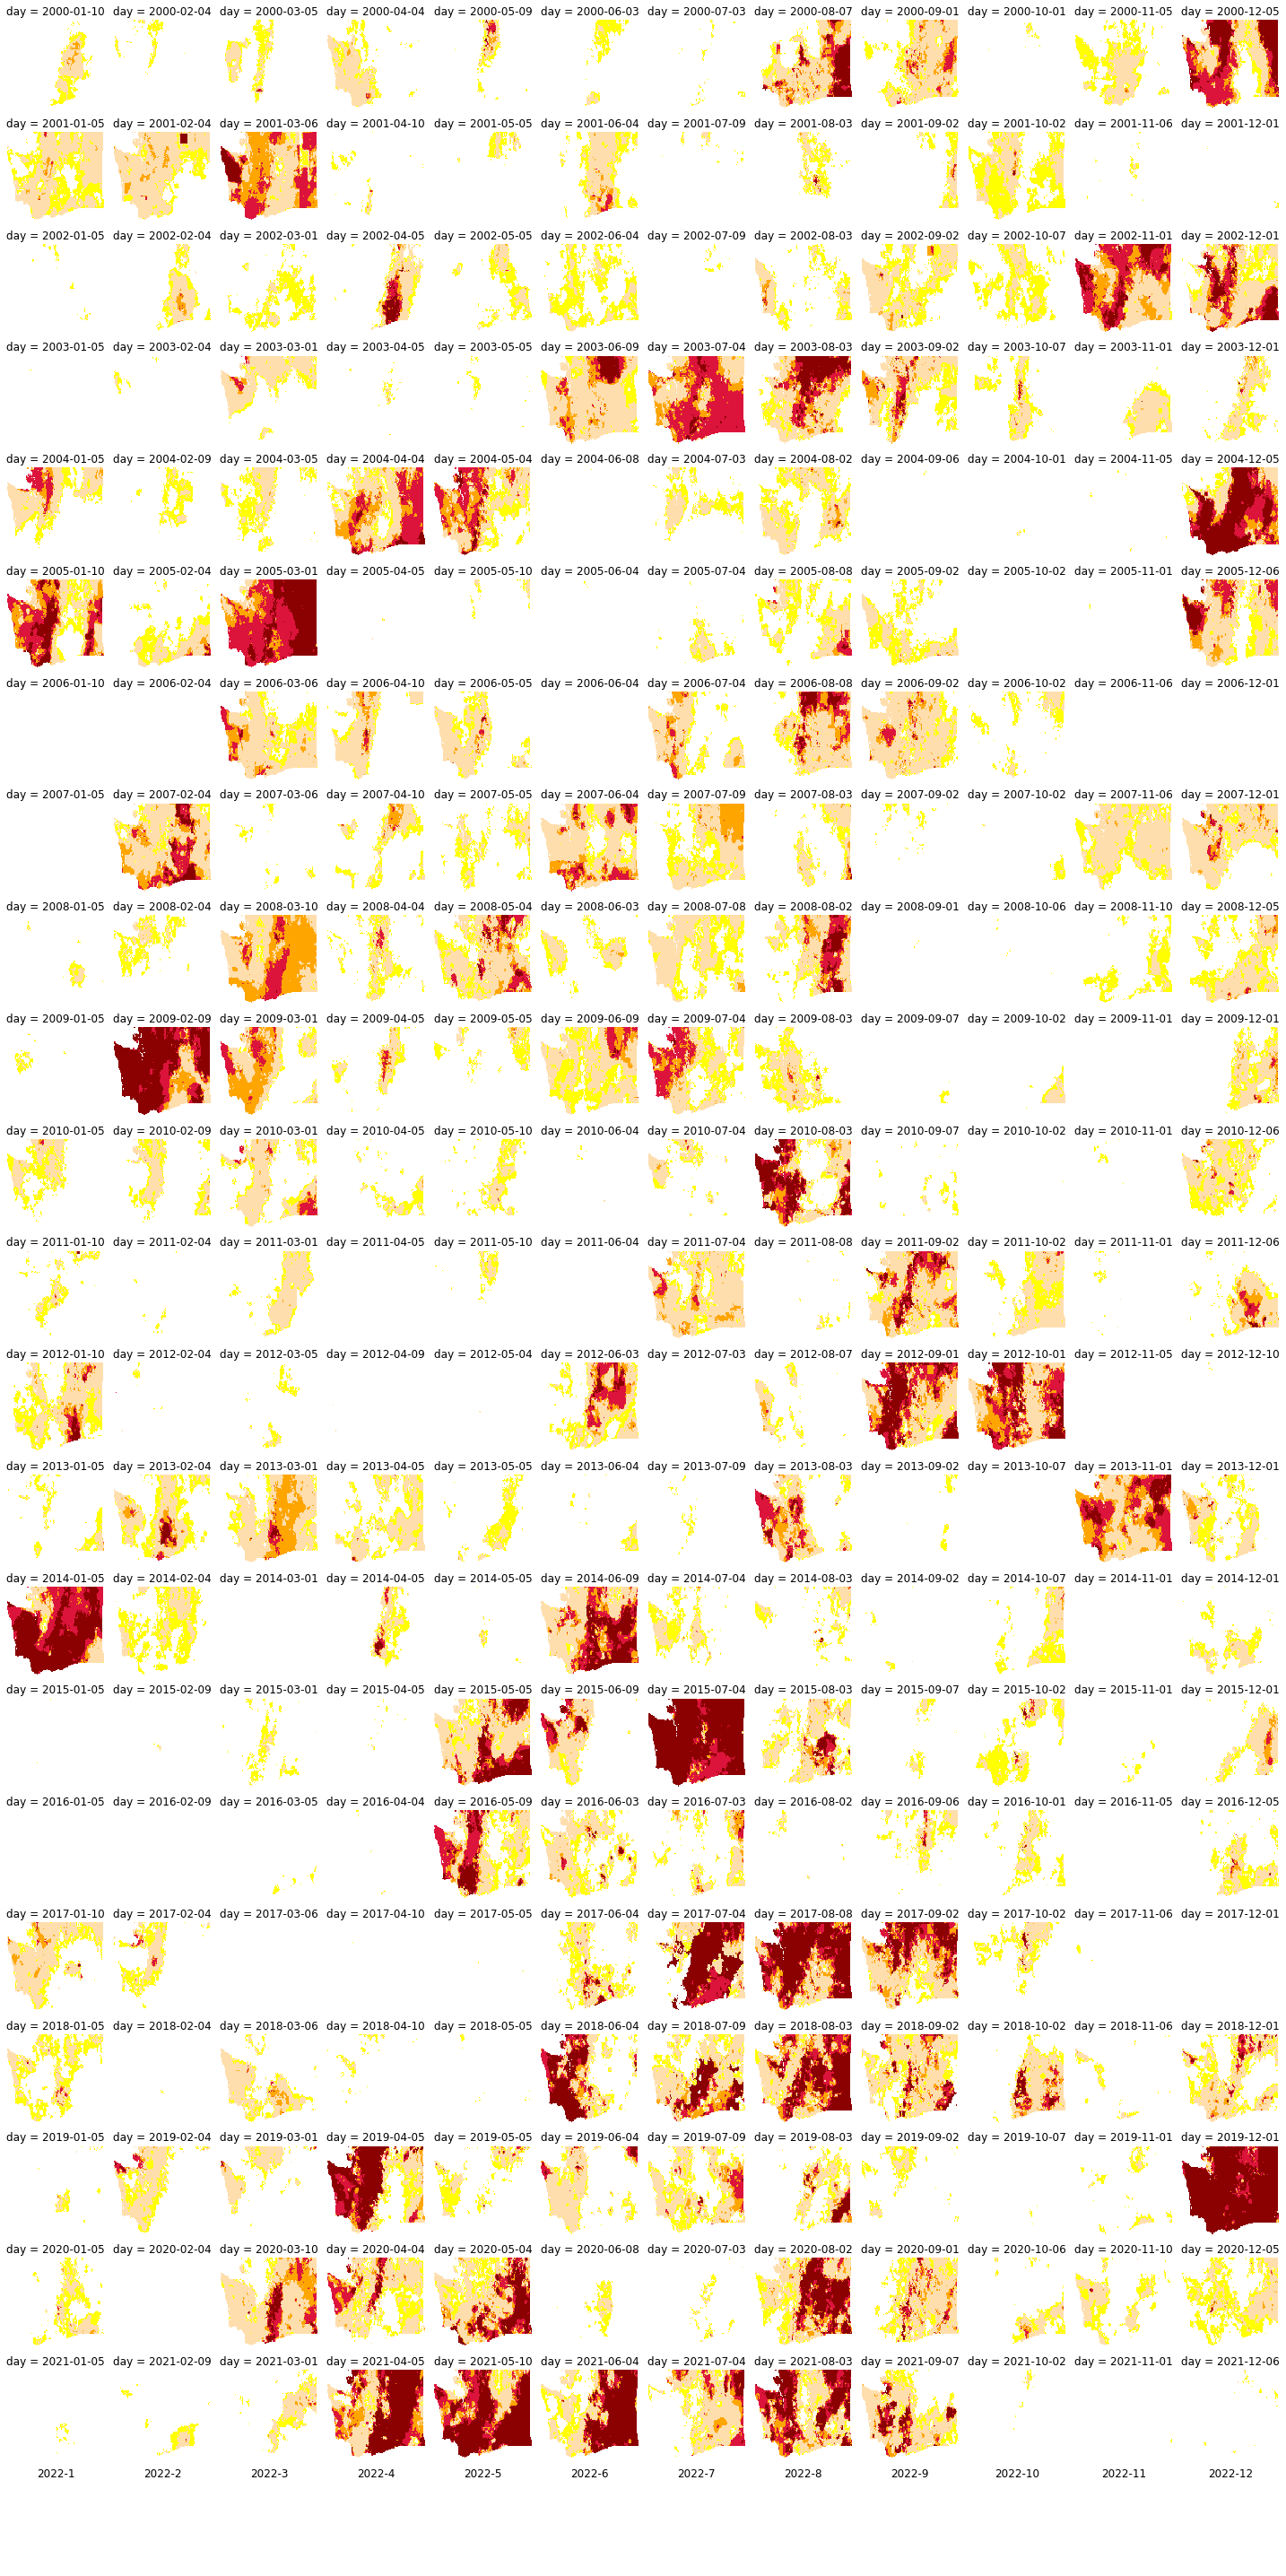

In [19]:
years = np.arange(2000, 2023, 1)
months = np.arange(1,13,1)

fig, axs = plt.subplots(23, 12, figsize=(20, 40))

for i, year in enumerate(years):
    for j, month in enumerate(months):
        try:
            axs[i,j].set_title(f'{year}-{month}')
            spi['spi_30d'].sel(day=f'{year}-{month}').isel(day=0).plot(ax=axs[i,j], cmap=cmap, vmin=-1, vmax=4, add_colorbar=False)
            
            
        except:
            pass

        axs[i,j].axis('off')

plt.tight_layout()

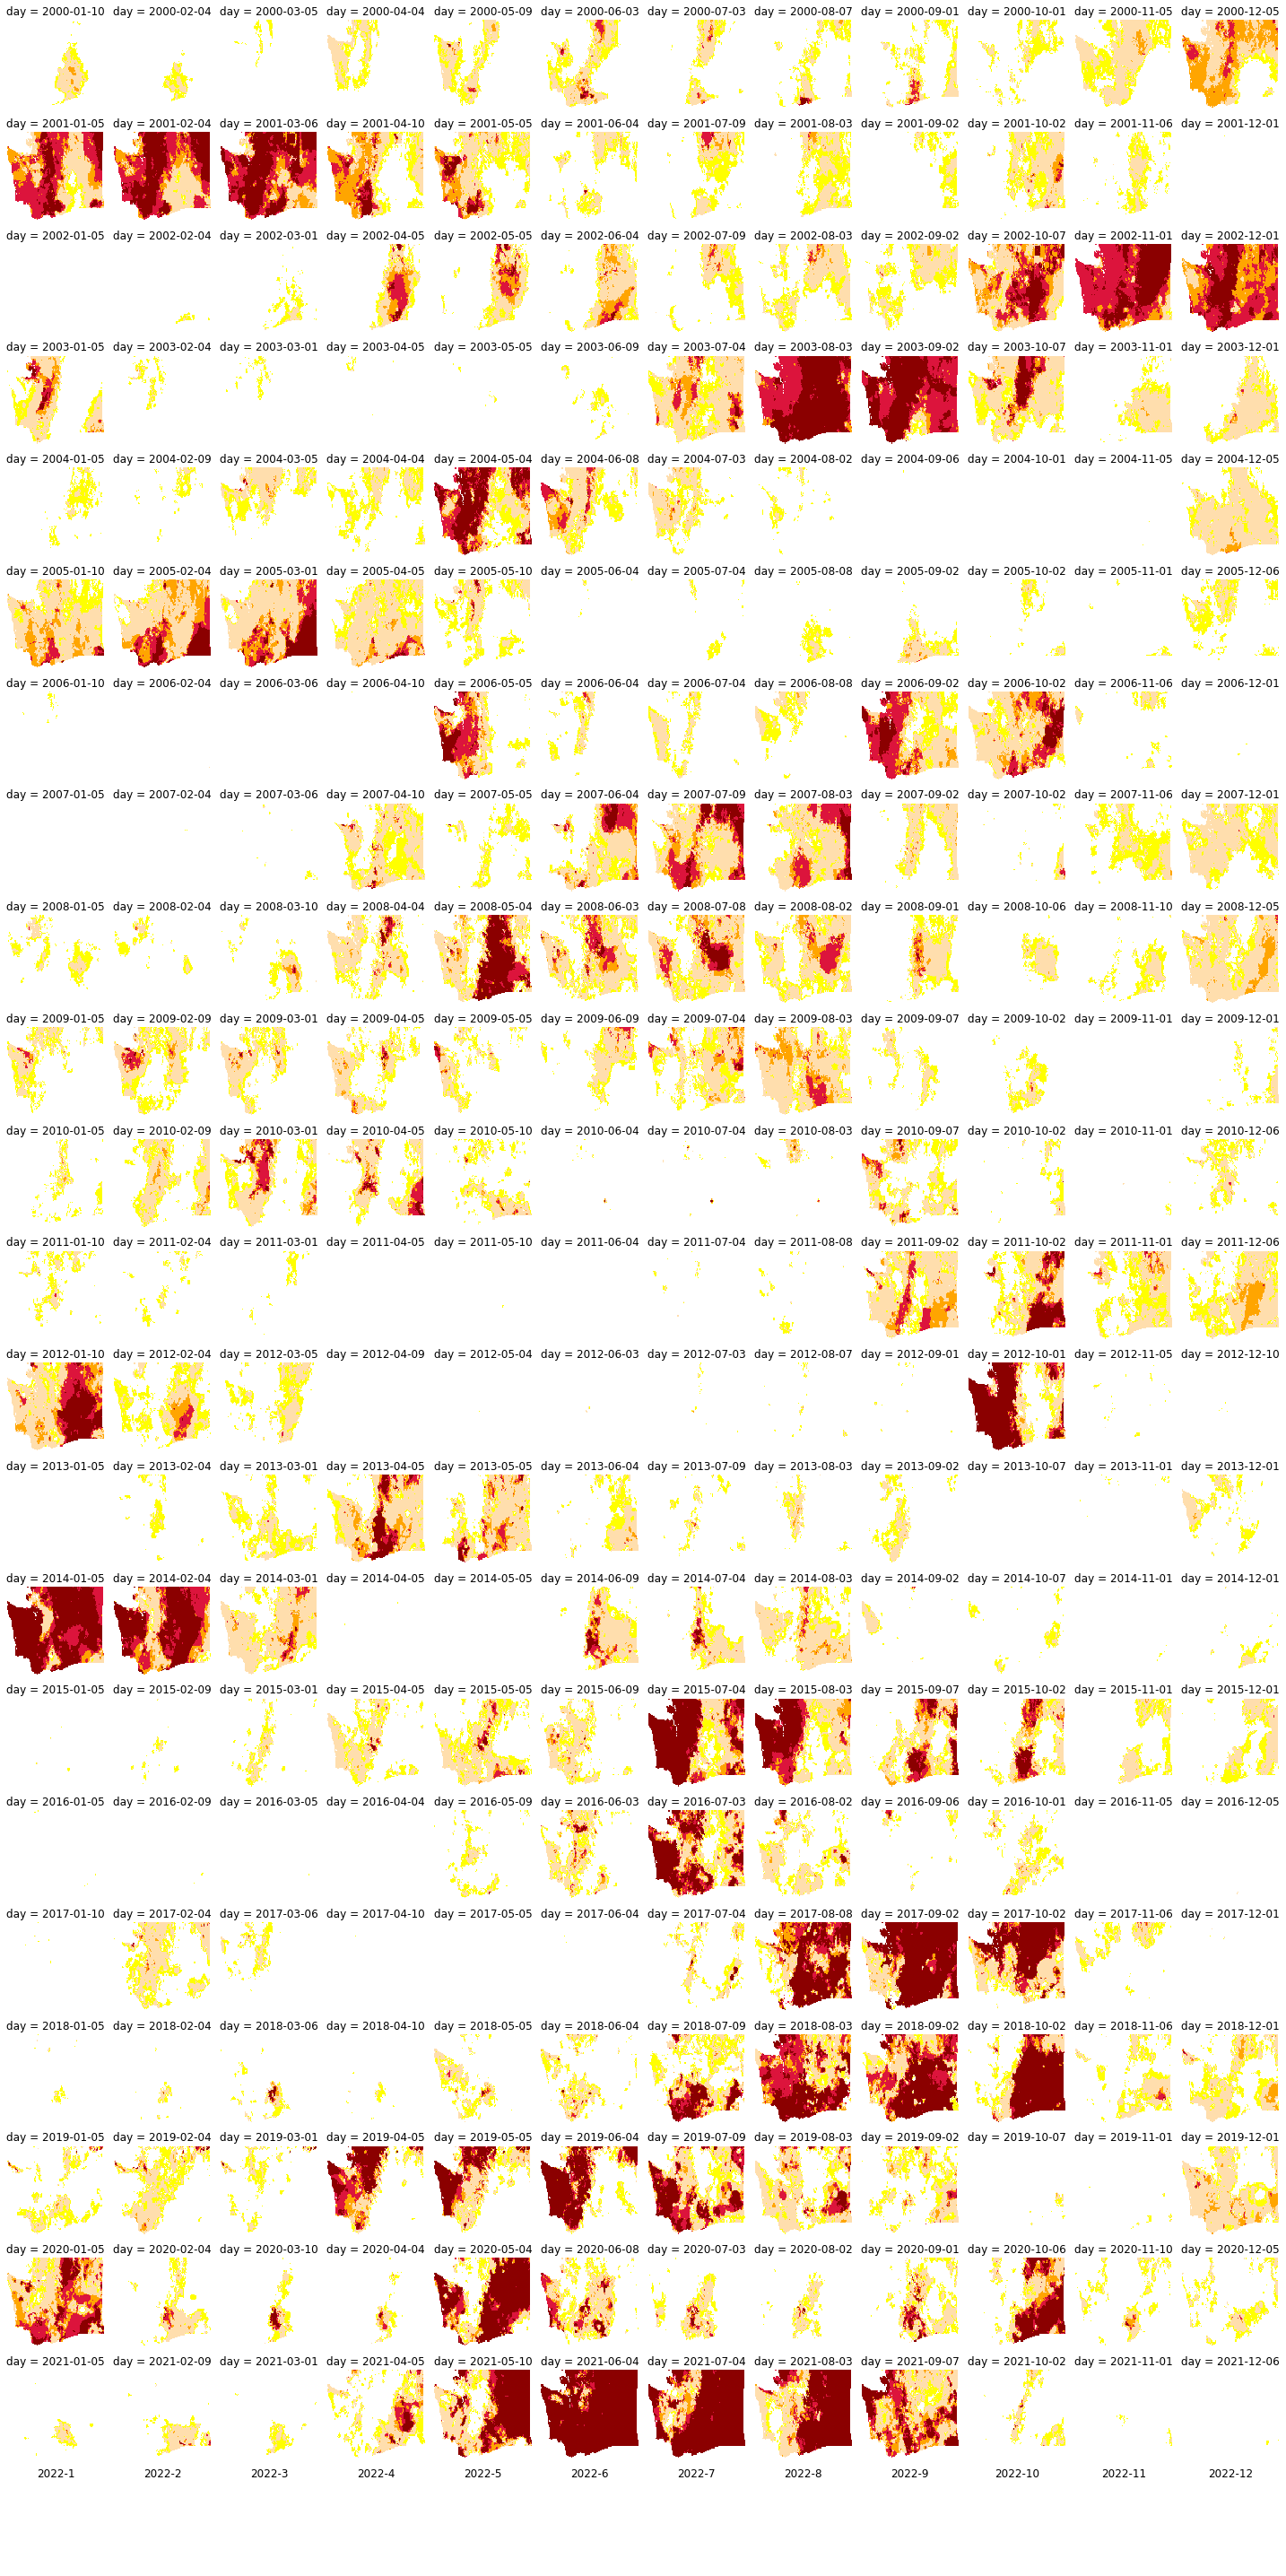

In [20]:
years = np.arange(2000, 2023, 1)
months = np.arange(1,13,1)

fig, axs = plt.subplots(23, 12, figsize=(20, 40))

for i, year in enumerate(years):
    for j, month in enumerate(months):
        try:
            axs[i,j].set_title(f'{year}-{month}')
            spi['spi_90d'].sel(day=f'{year}-{month}').isel(day=0).plot(ax=axs[i,j], cmap=cmap, vmin=-1, vmax=4, add_colorbar=False)
            
            
        except:
            pass

        axs[i,j].axis('off')

plt.tight_layout()

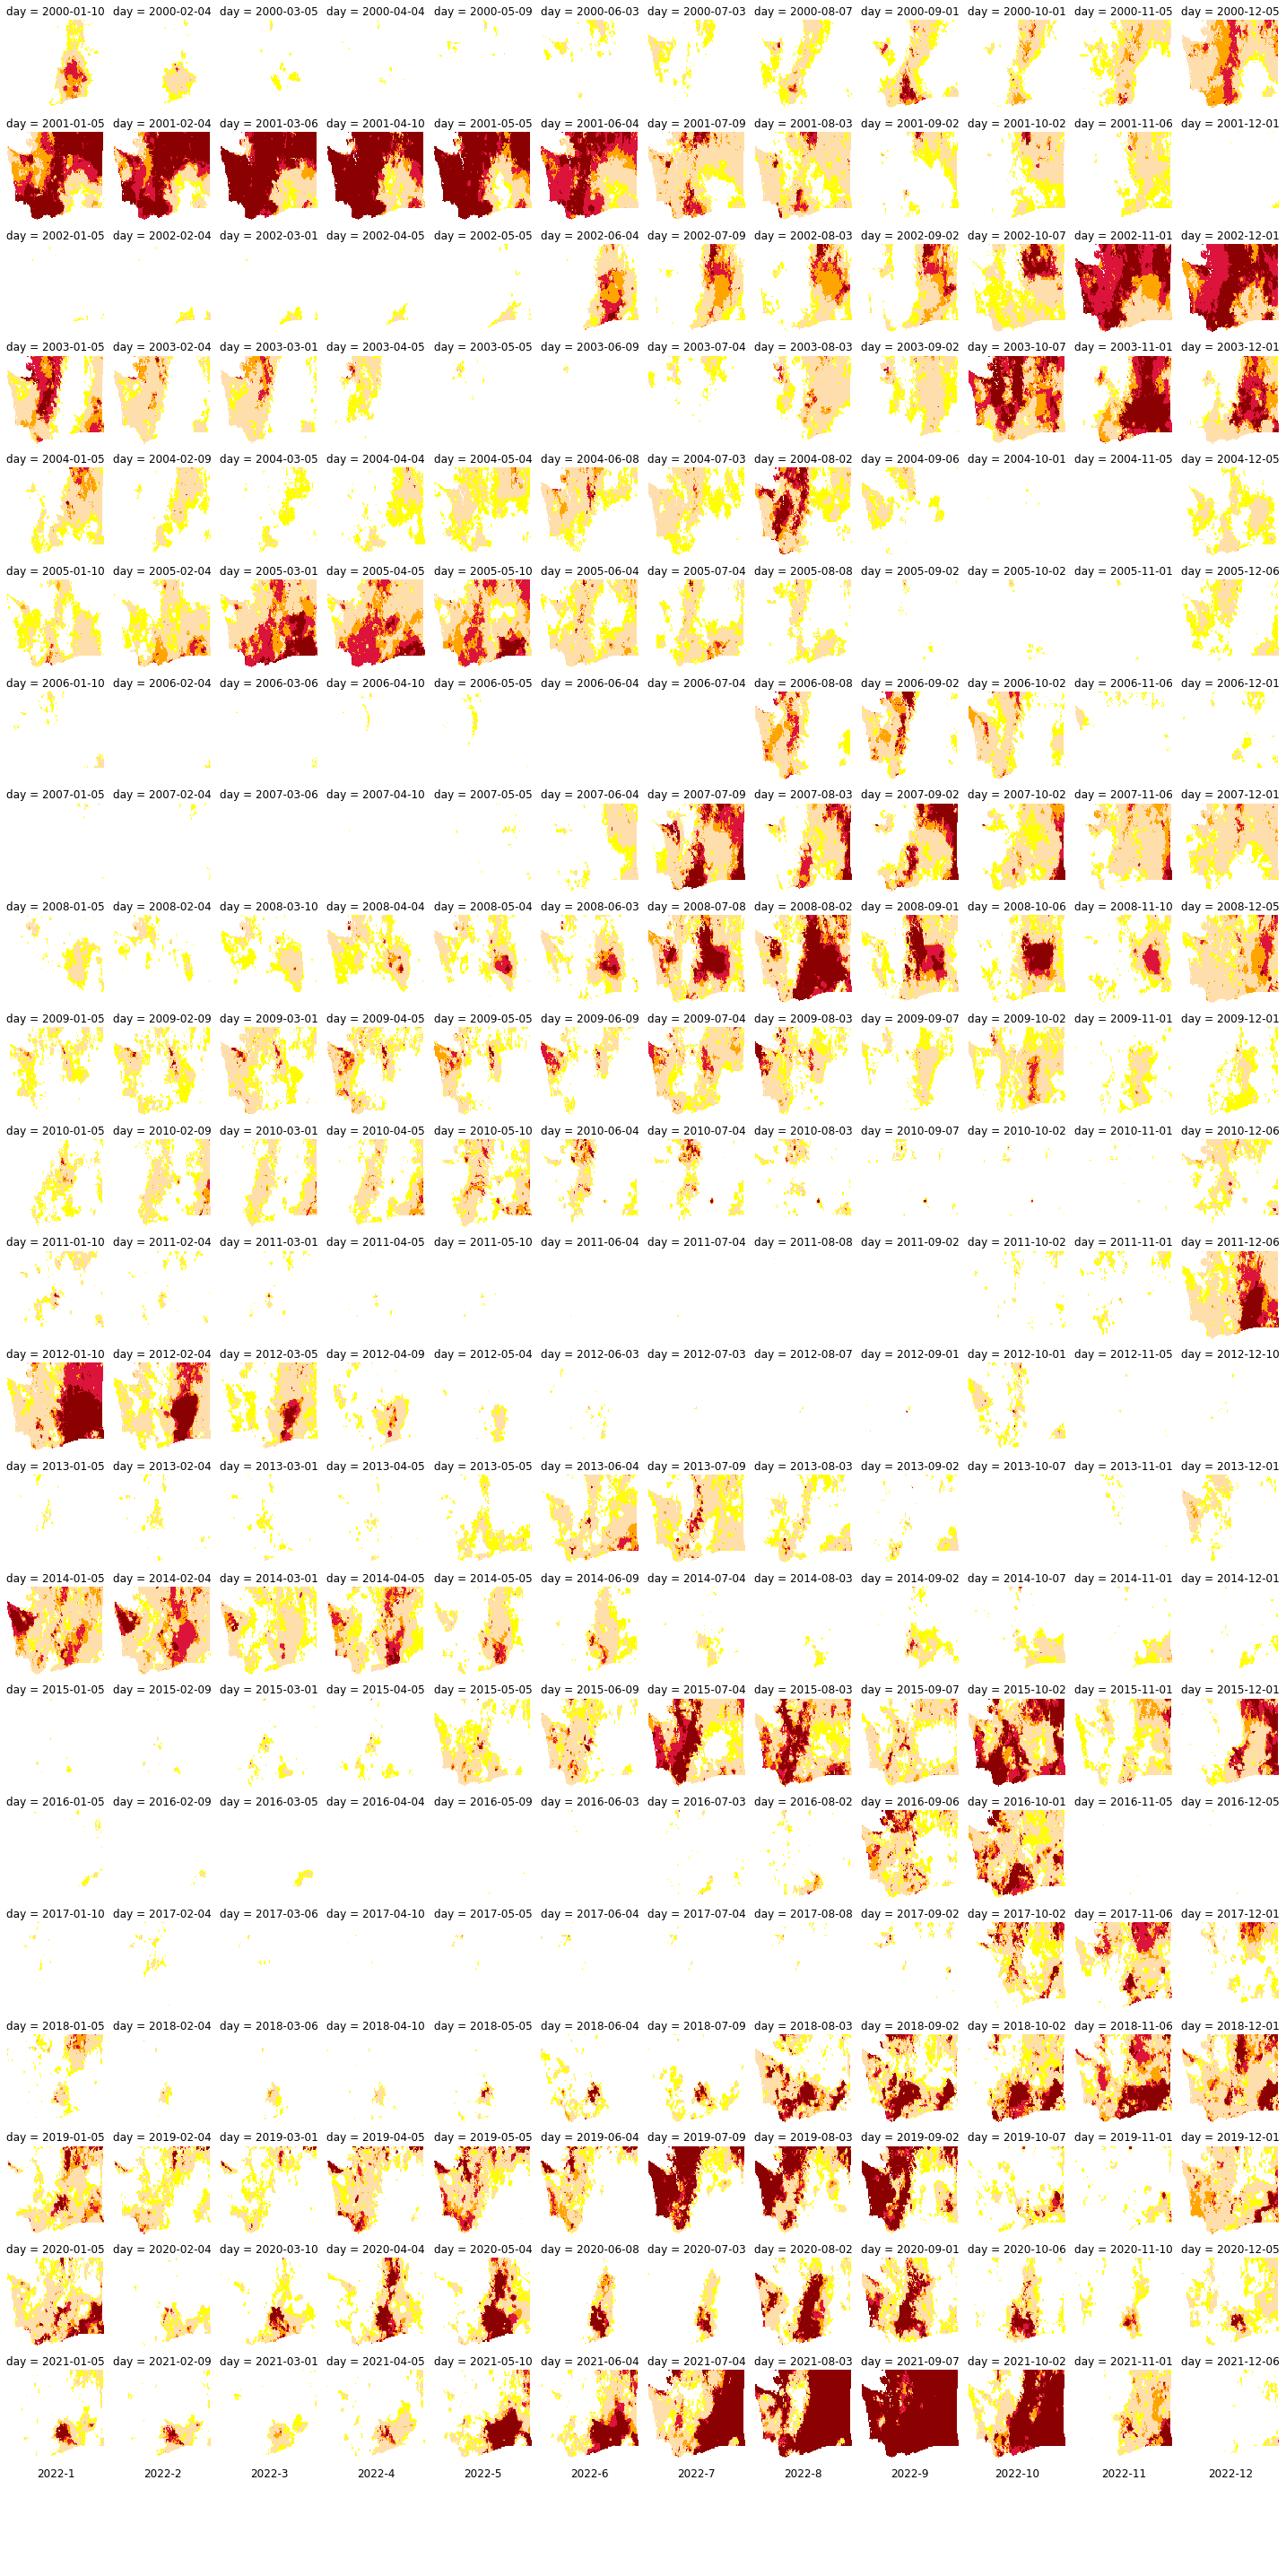

In [21]:
years = np.arange(2000, 2023, 1)
months = np.arange(1,13,1)

fig, axs = plt.subplots(23, 12, figsize=(20, 40))

for i, year in enumerate(years):
    for j, month in enumerate(months):
        try:
            axs[i,j].set_title(f'{year}-{month}')
            spi['spi_180d'].sel(day=f'{year}-{month}').isel(day=0).plot(ax=axs[i,j], cmap=cmap, vmin=-1, vmax=4, add_colorbar=False)
            
            
        except:
            pass

        axs[i,j].axis('off')

plt.tight_layout()

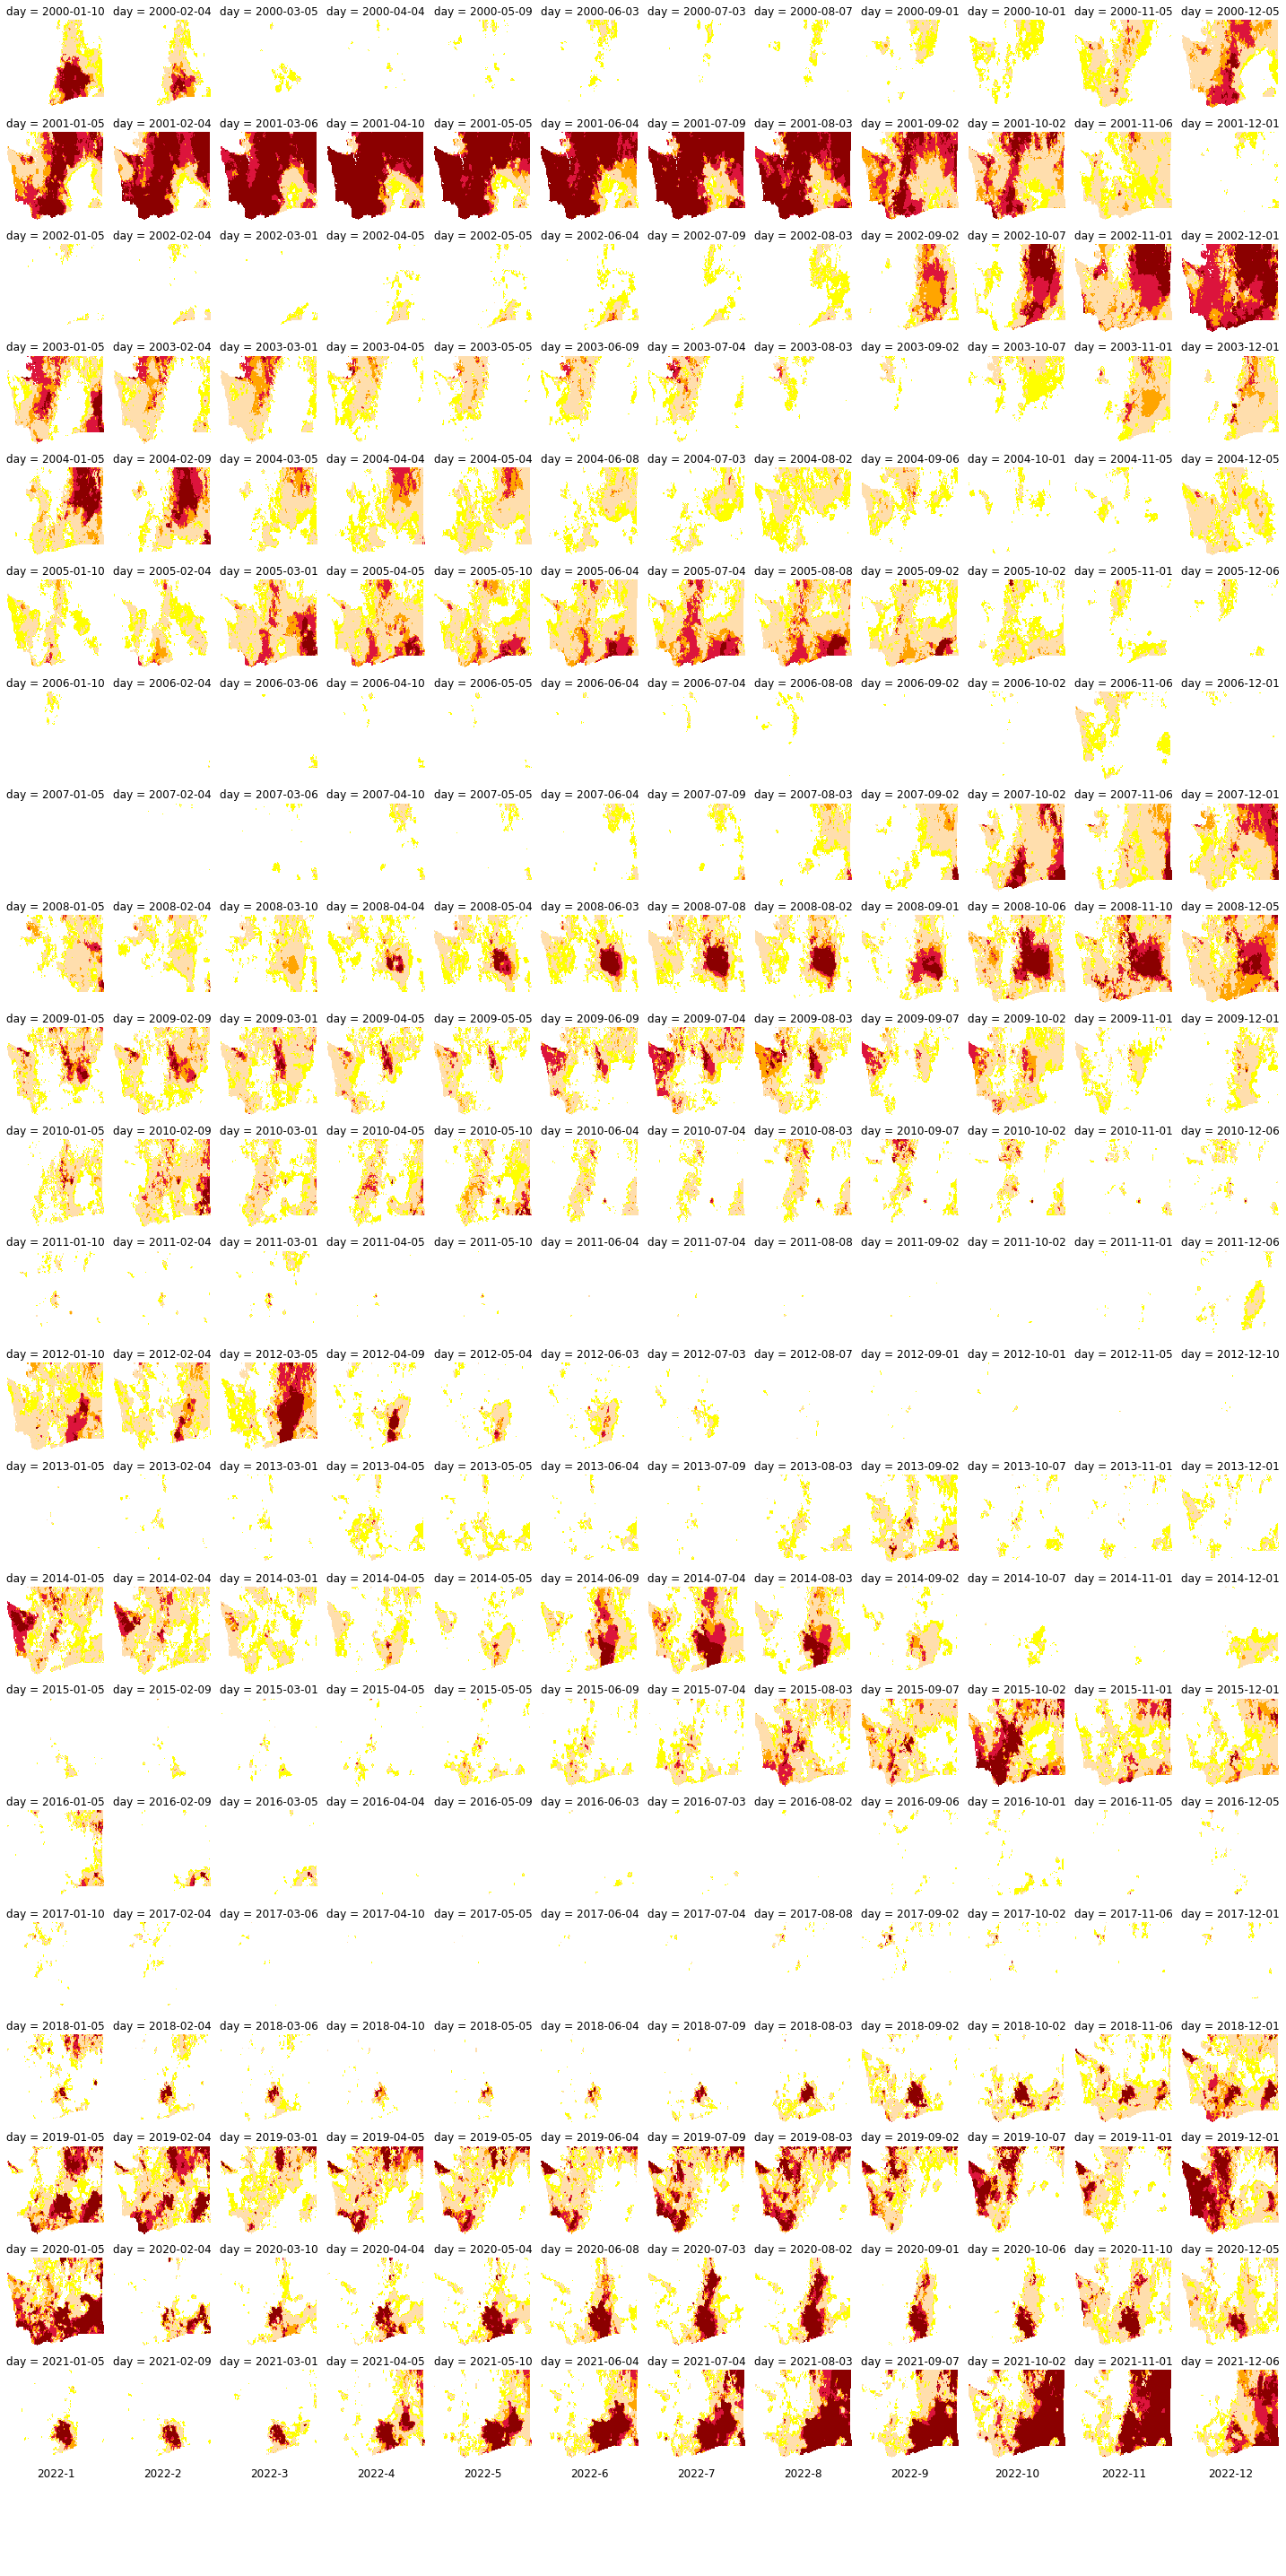

In [22]:
years = np.arange(2000, 2023, 1)
months = np.arange(1,13,1)

fig, axs = plt.subplots(23, 12, figsize=(20, 40))

for i, year in enumerate(years):
    for j, month in enumerate(months):
        try:
            axs[i,j].set_title(f'{year}-{month}')
            spi['spi_270d'].sel(day=f'{year}-{month}').isel(day=0).plot(ax=axs[i,j], cmap=cmap, vmin=-1, vmax=4, add_colorbar=False)
            
            
        except:
            pass

        axs[i,j].axis('off')

plt.tight_layout()

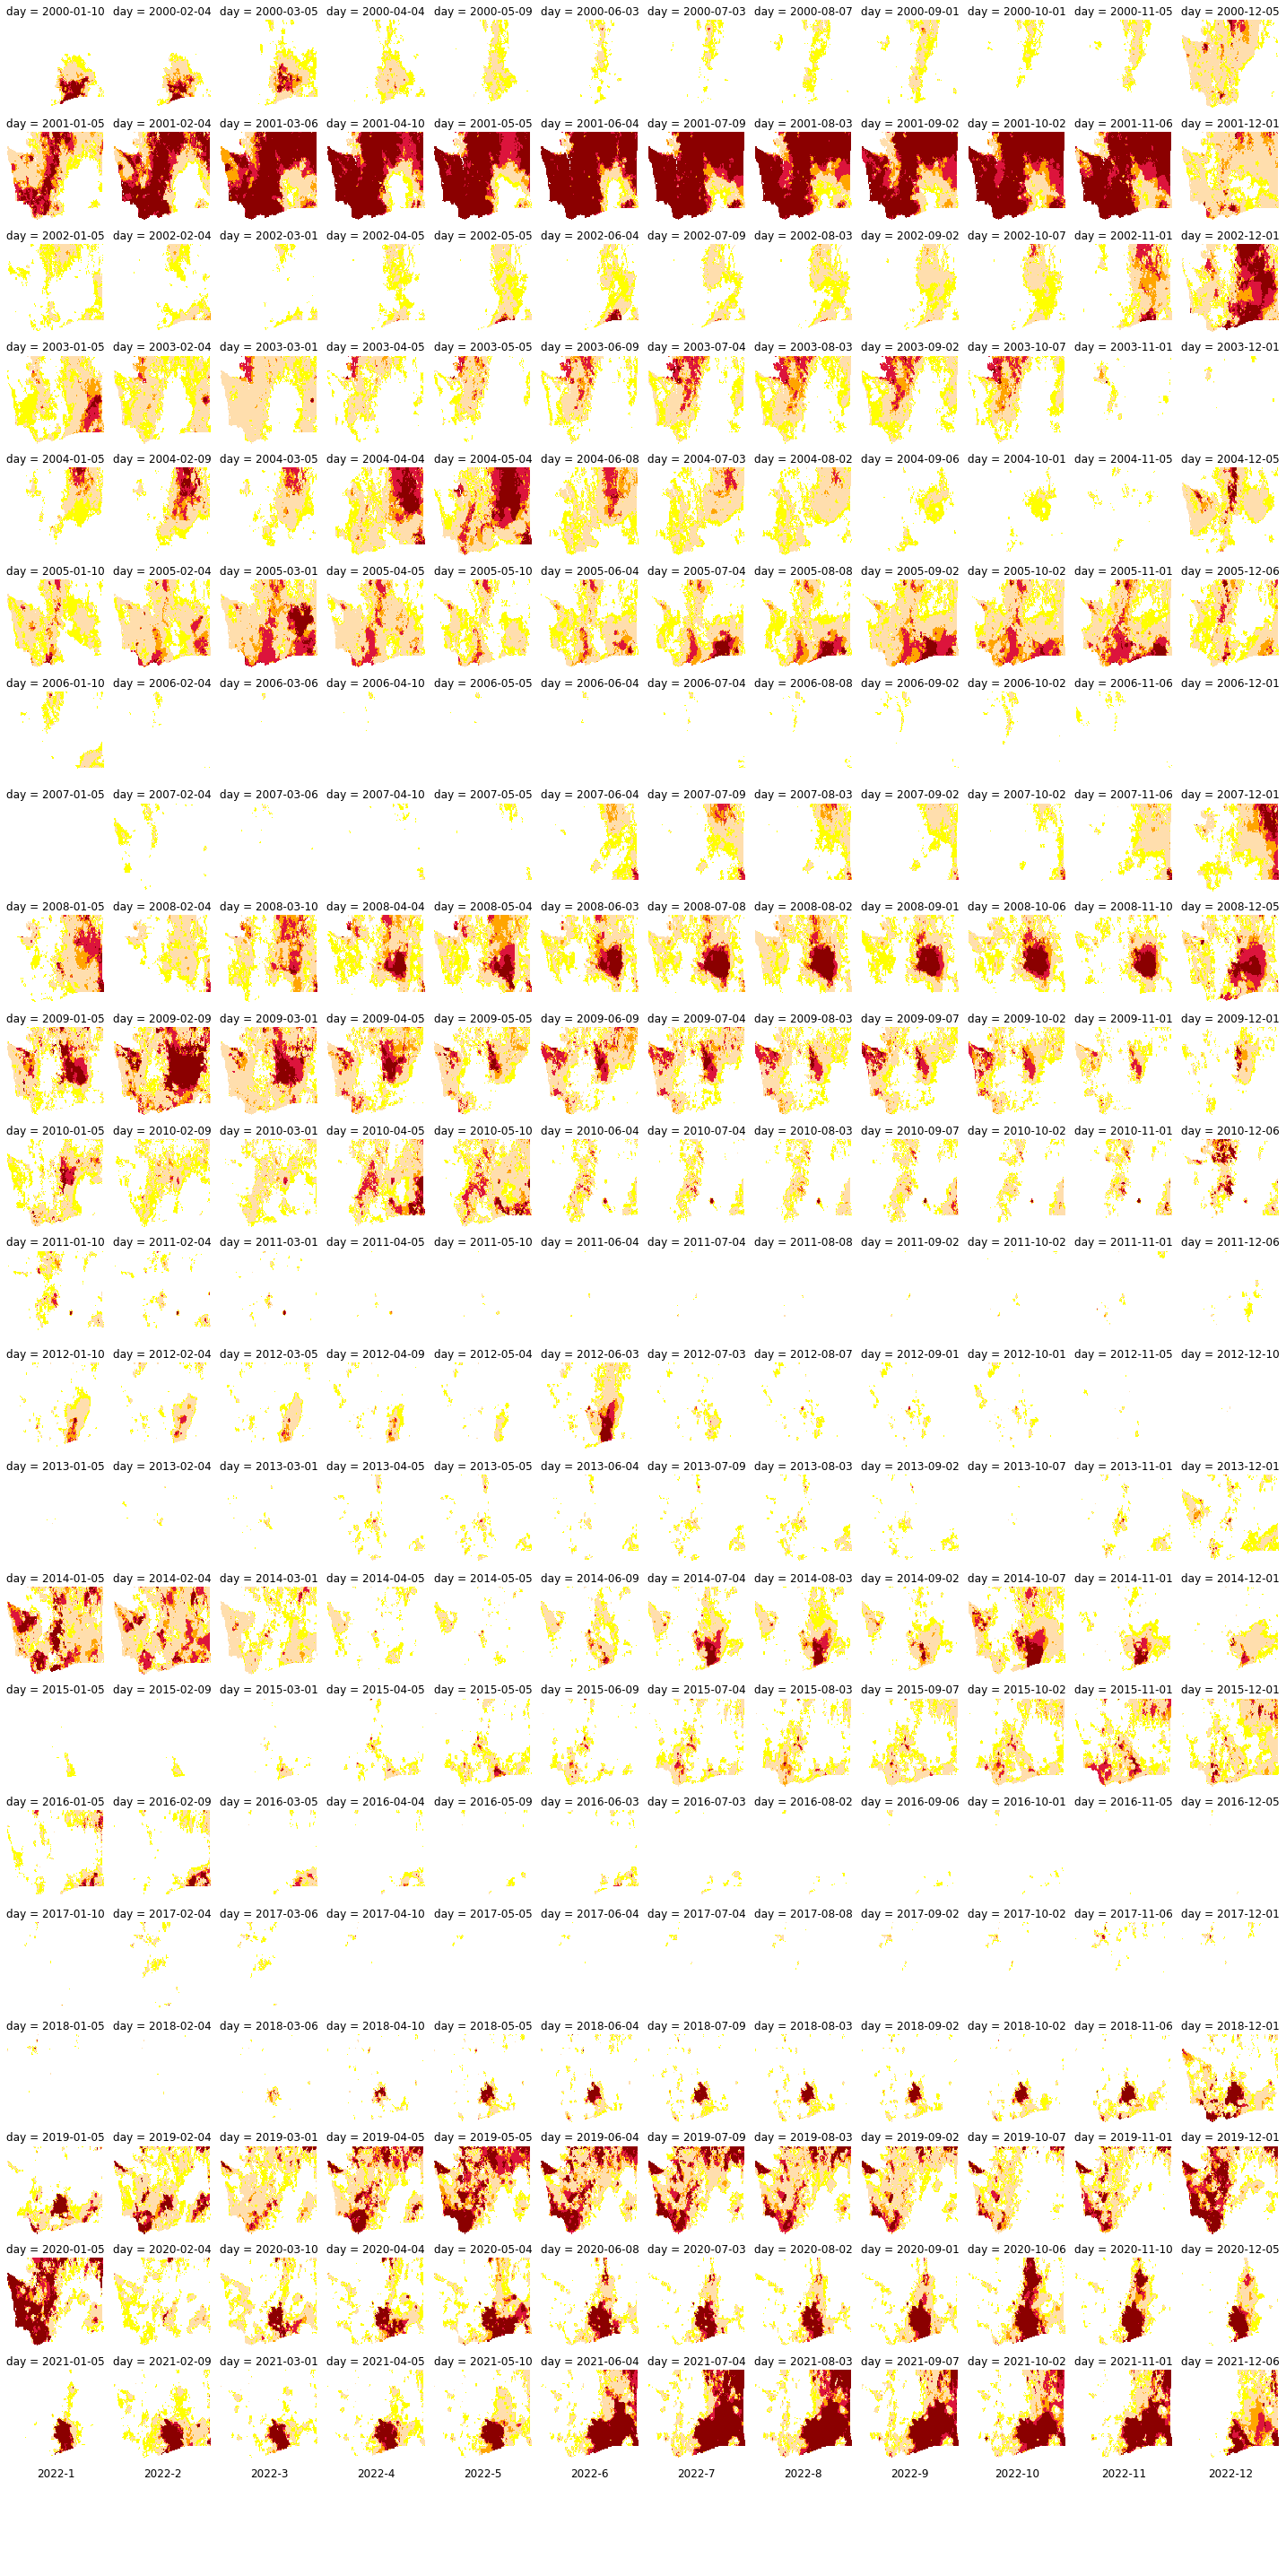

In [23]:
years = np.arange(2000, 2023, 1)
months = np.arange(1,13,1)

fig, axs = plt.subplots(23, 12, figsize=(20, 40))

for i, year in enumerate(years):
    for j, month in enumerate(months):
        try:
            axs[i,j].set_title(f'{year}-{month}')
            spi['spi_1y'].sel(day=f'{year}-{month}').isel(day=0).plot(ax=axs[i,j], cmap=cmap, vmin=-1, vmax=4, add_colorbar=False)
            
            
        except:
            pass

        axs[i,j].axis('off')

plt.tight_layout()

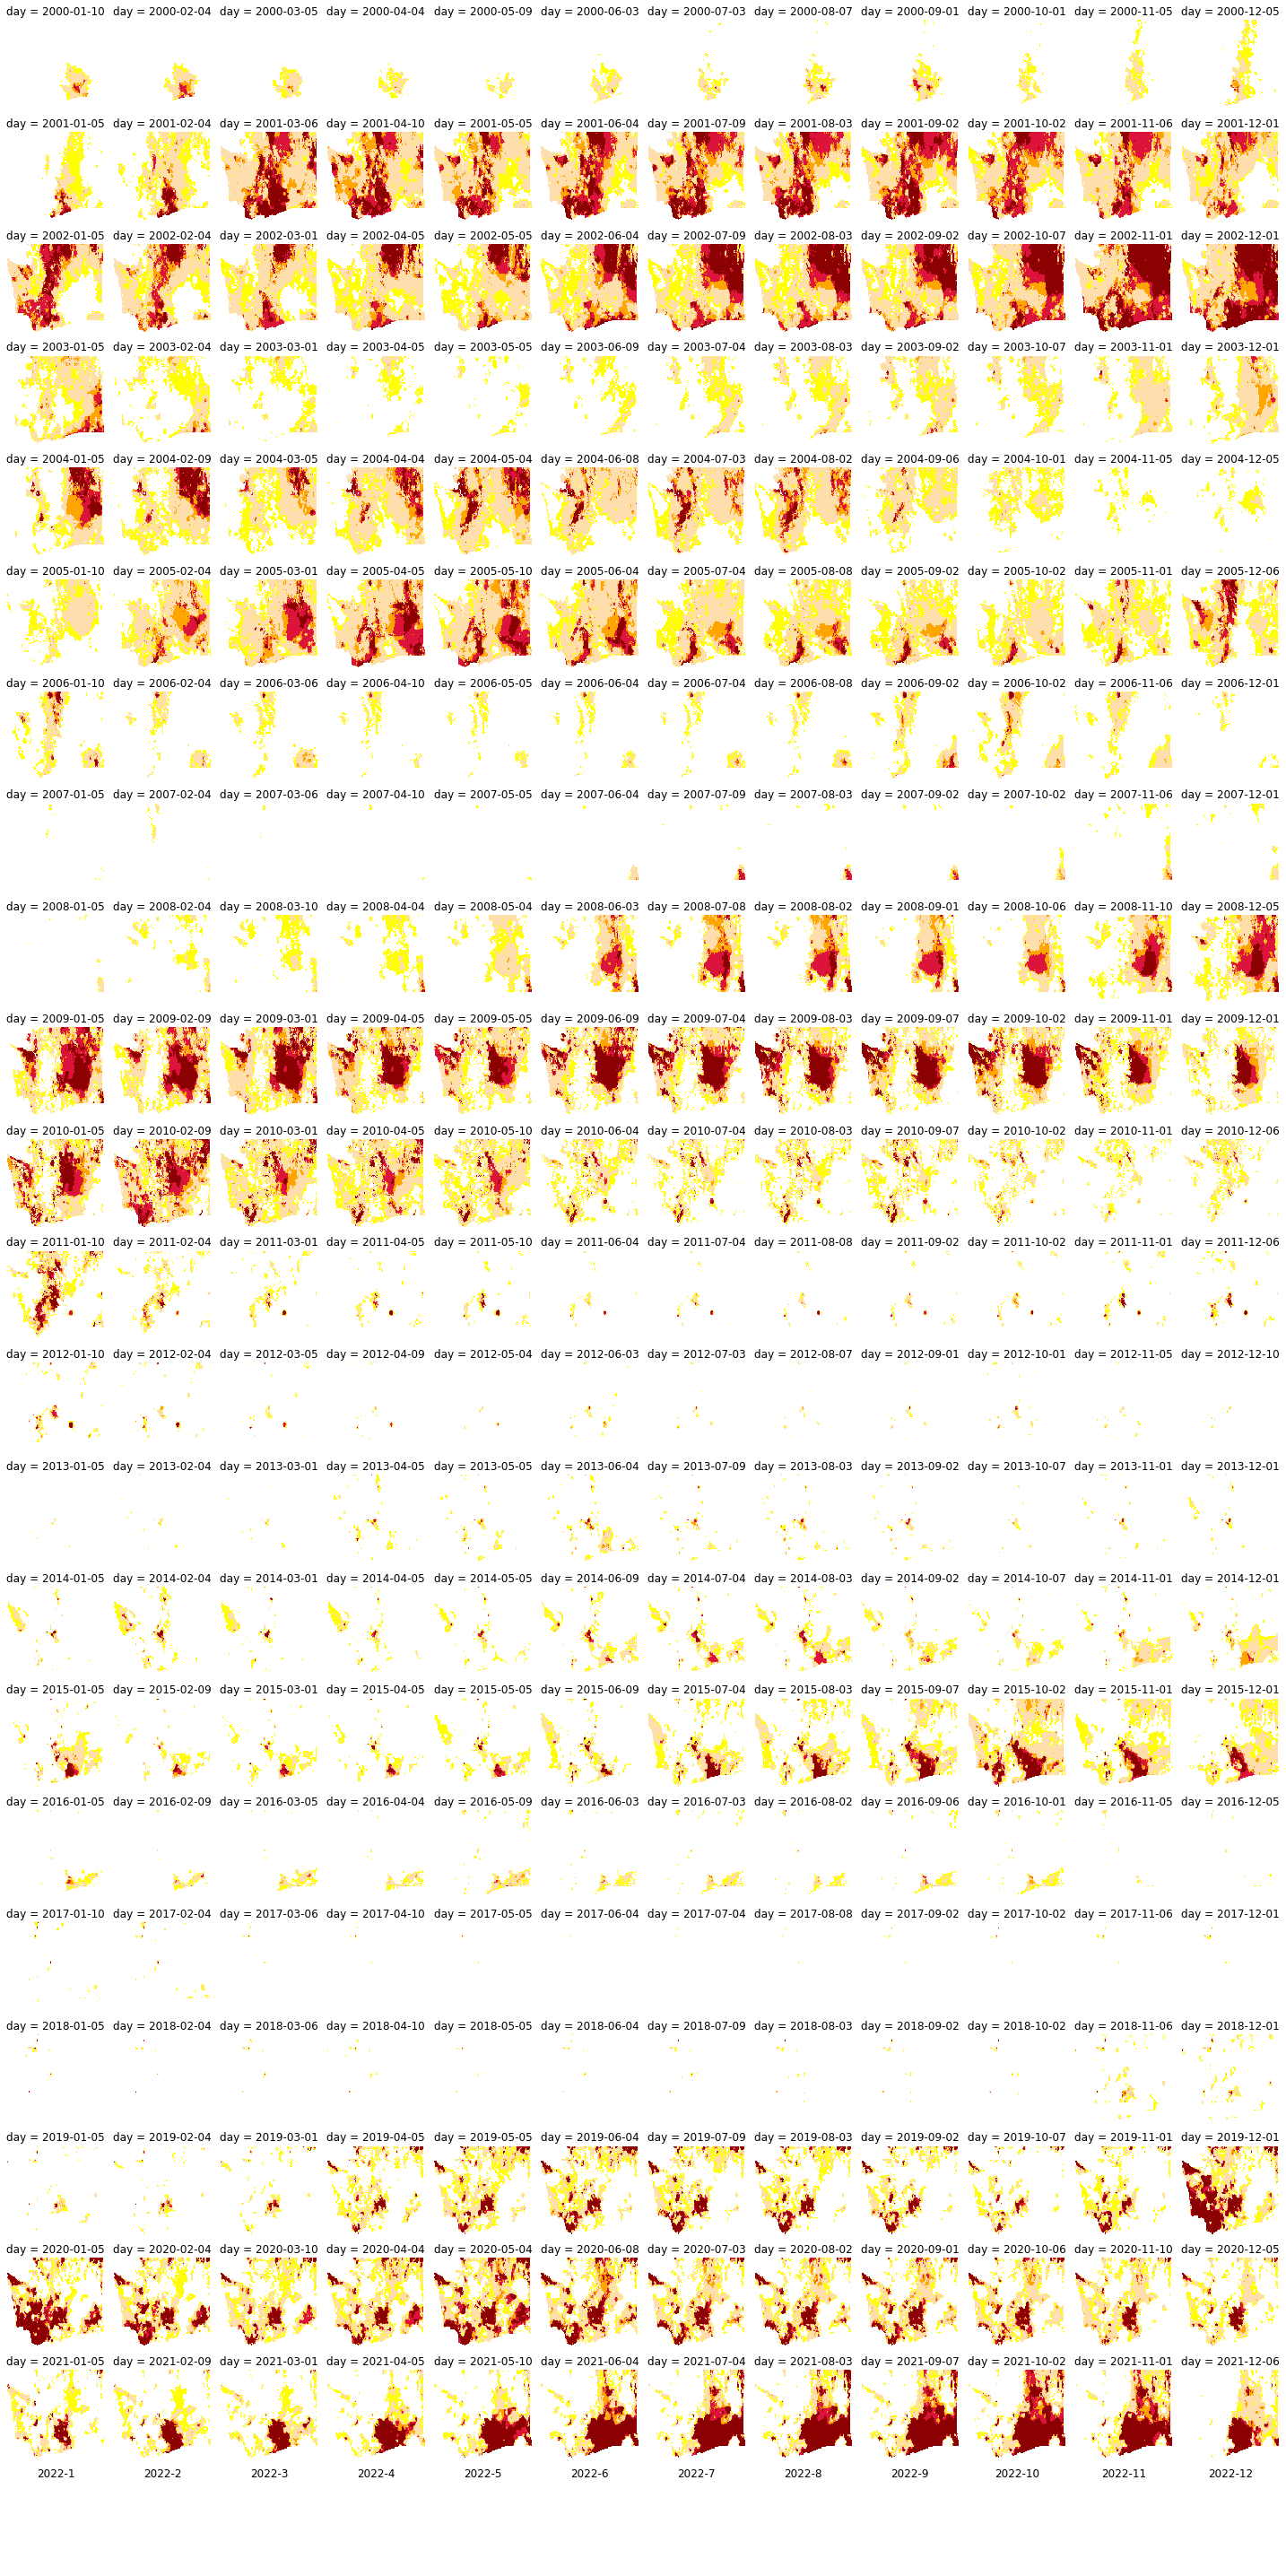

In [24]:
years = np.arange(2000, 2023, 1)
months = np.arange(1,13,1)

fig, axs = plt.subplots(23, 12, figsize=(20, 40))

for i, year in enumerate(years):
    for j, month in enumerate(months):
        try:
            axs[i,j].set_title(f'{year}-{month}')
            spi['spi_2y'].sel(day=f'{year}-{month}').isel(day=0).plot(ax=axs[i,j], cmap=cmap, vmin=-1, vmax=4, add_colorbar=False)
            
            
        except:
            pass

        axs[i,j].axis('off')

plt.tight_layout()

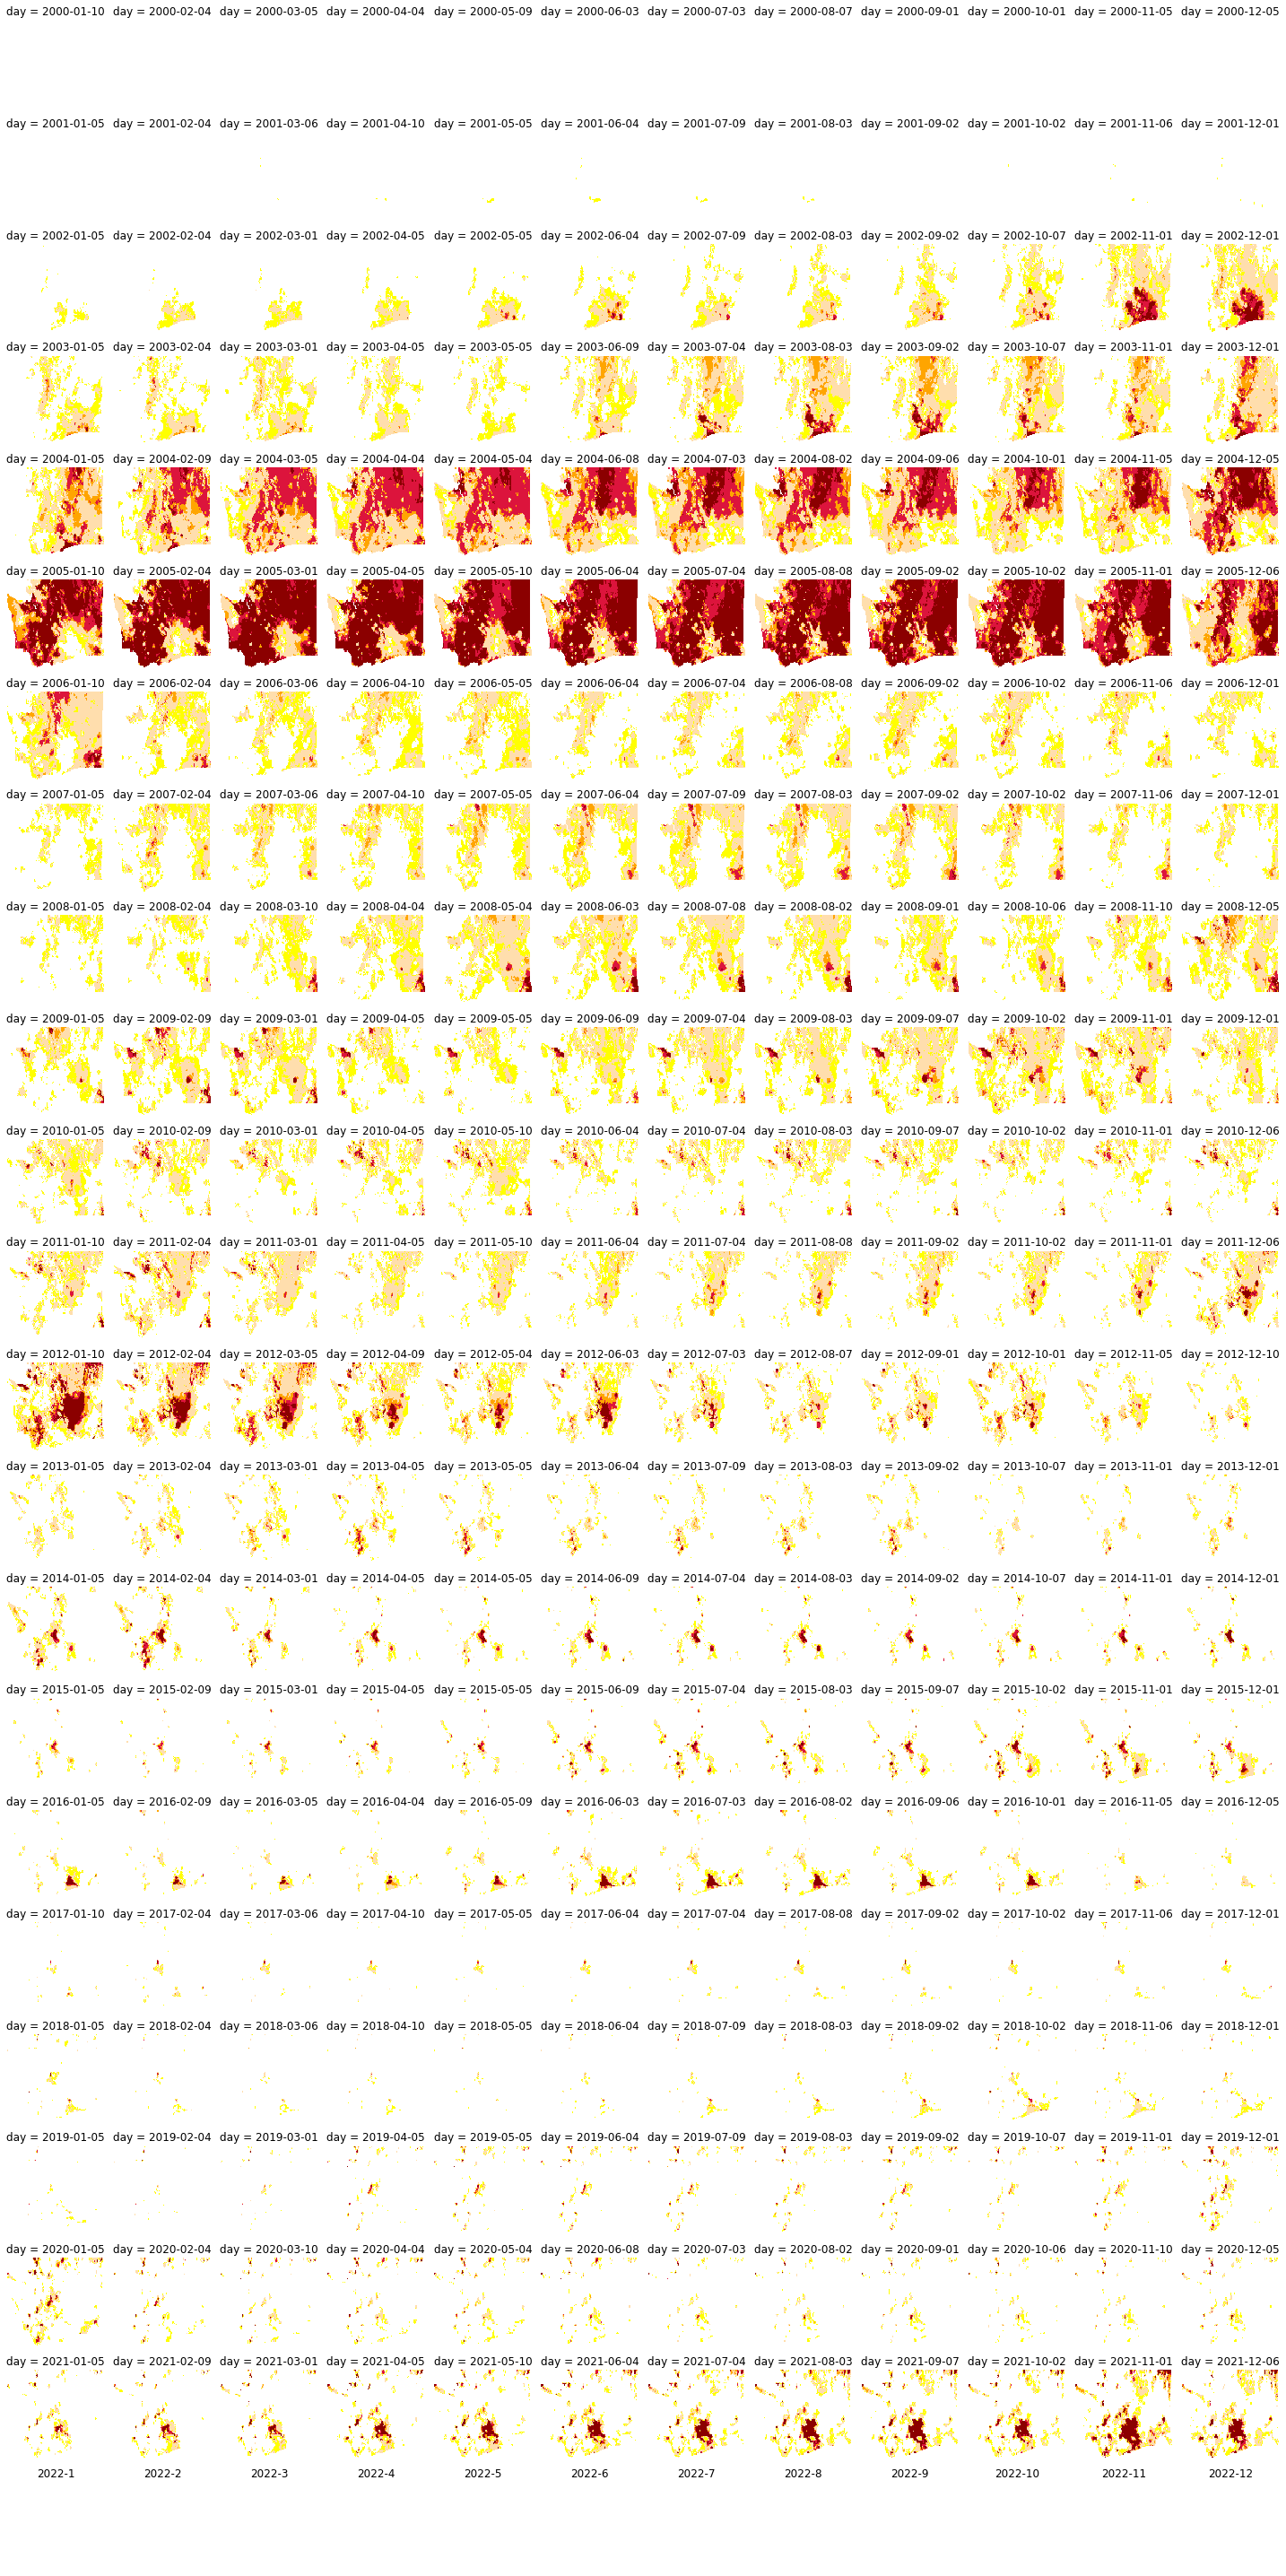

In [25]:
years = np.arange(2000, 2023, 1)
months = np.arange(1,13,1)

fig, axs = plt.subplots(23, 12, figsize=(20, 40))

for i, year in enumerate(years):
    for j, month in enumerate(months):
        try:
            axs[i,j].set_title(f'{year}-{month}')
            spi['spi_5y'].sel(day=f'{year}-{month}').isel(day=0).plot(ax=axs[i,j], cmap=cmap, vmin=-1, vmax=4, add_colorbar=False)
            
            
        except:
            pass

        axs[i,j].axis('off')

plt.tight_layout()